In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltnn
import seaborn as sns

In [393]:
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data')
df = pd.read_csv('./mushroom_csv.csv')

print(df.head())
# print(vars(df))
print(len(df))

  cap-shape cap-surface cap-color bruises%3F odor gill-attachment  \
0         x           s         n          t    p               f   
1         x           s         y          t    a               f   
2         b           s         w          t    l               f   
3         x           y         w          t    p               f   
4         x           s         g          f    n               f   

  gill-spacing gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0            c         n          k           e  ...                      w   
1            c         b          k           e  ...                      w   
2            c         b          n           e  ...                      w   
3            c         n          n           e  ...                      w   
4            w         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p     

## Task 1

class  cap-shape
e      x            0.462928
       f            0.379278
       b            0.096008
       k            0.054183
       s            0.007605
p      x            0.436159
       f            0.397344
       k            0.153218
       b            0.012257
       c            0.001021
Name: cap-shape, dtype: float64
class  cap-surface
e      f              0.370722
       y              0.357414
       s              0.271863
p      y              0.444331
       s              0.360572
       f              0.194076
       g              0.001021
Name: cap-surface, dtype: float64
class  cap-color
e      n            0.300380
       g            0.245247
       w            0.171103
       e            0.148289
       y            0.095057
       p            0.013308
       b            0.011407
       c            0.007605
       r            0.003802
       u            0.003802
p      n            0.260470
       e            0.223698
       g            0.2063

/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


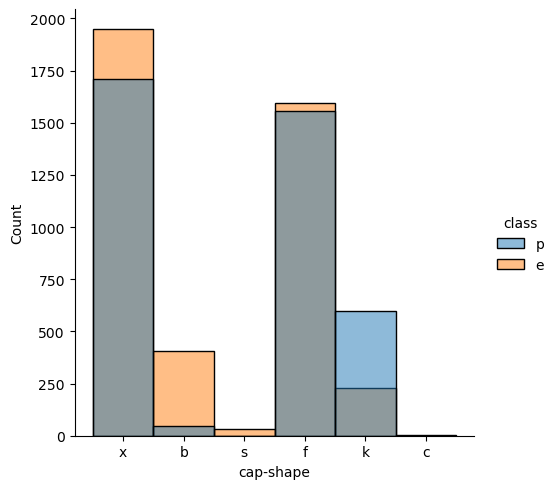

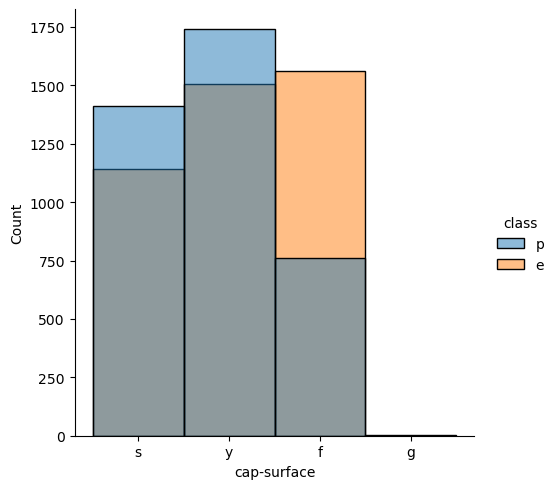

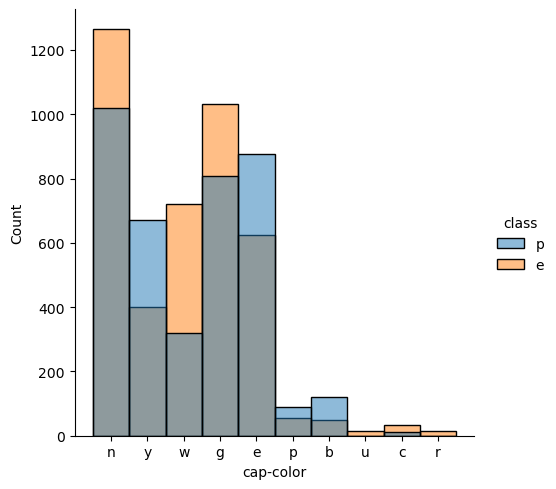

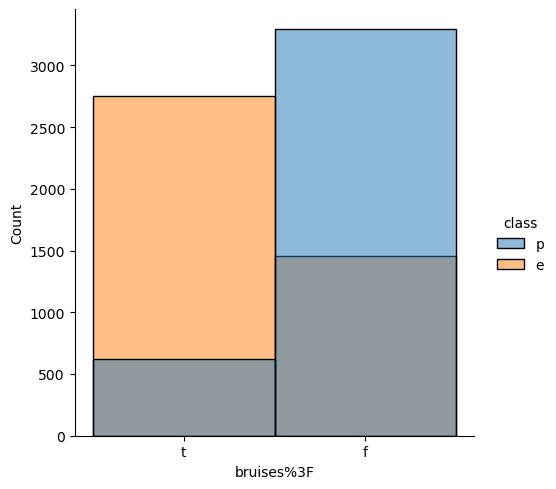

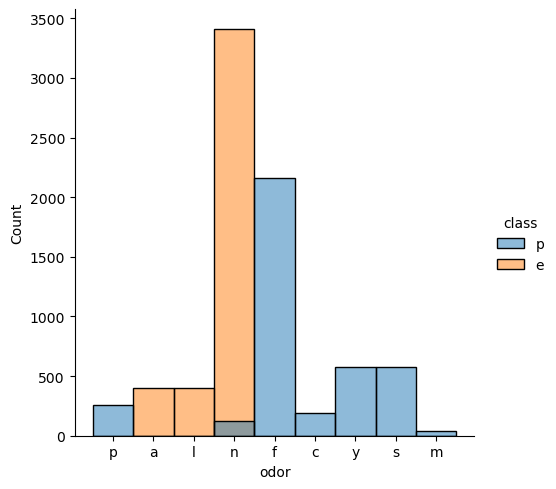

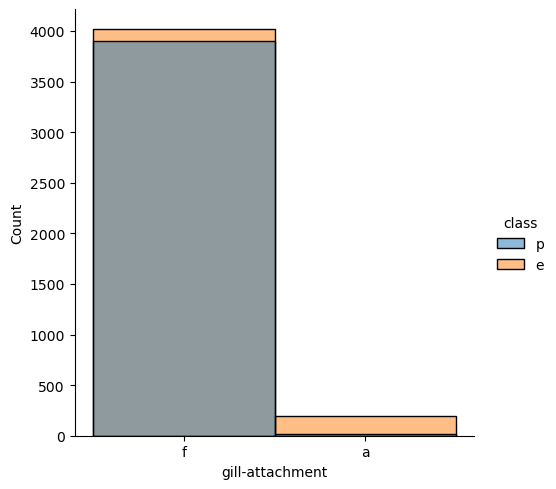

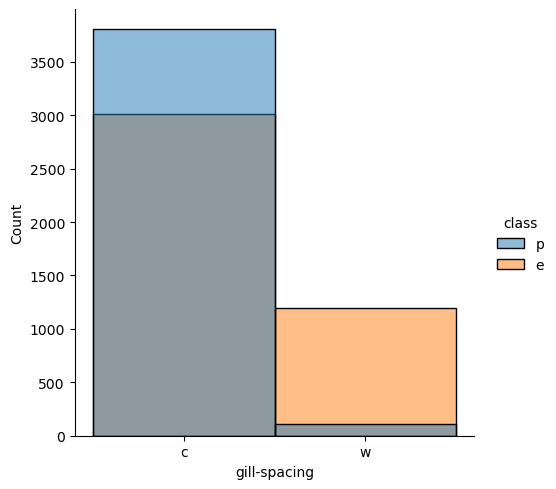

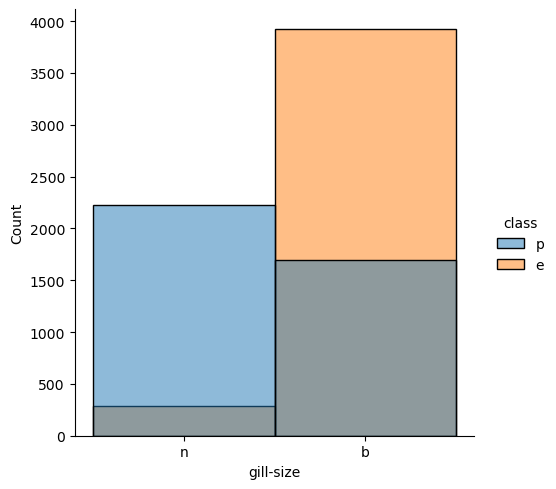

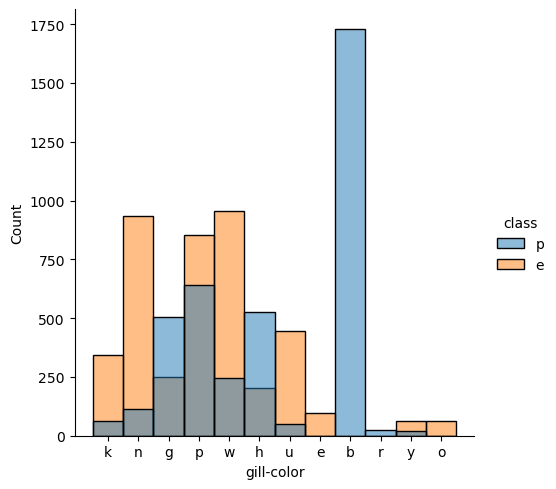

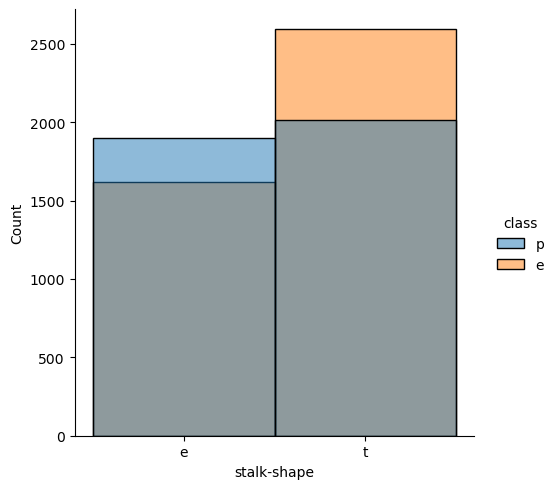

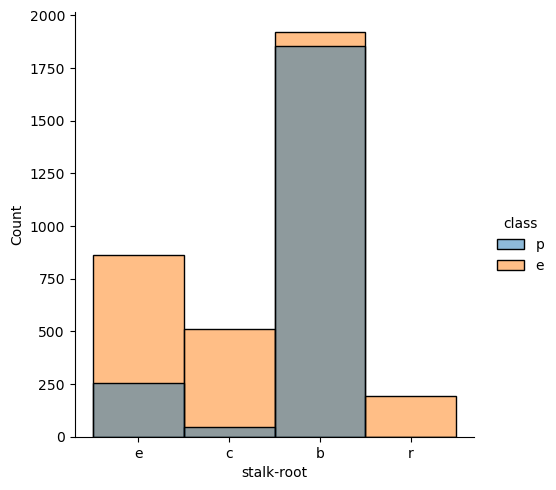

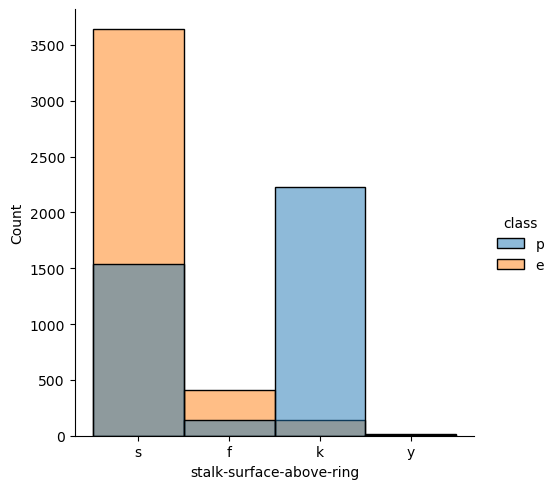

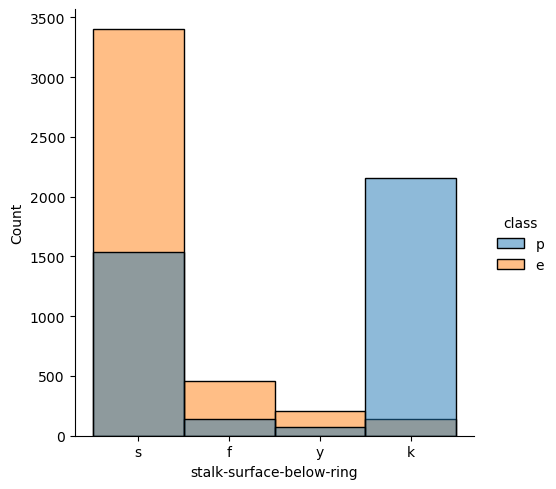

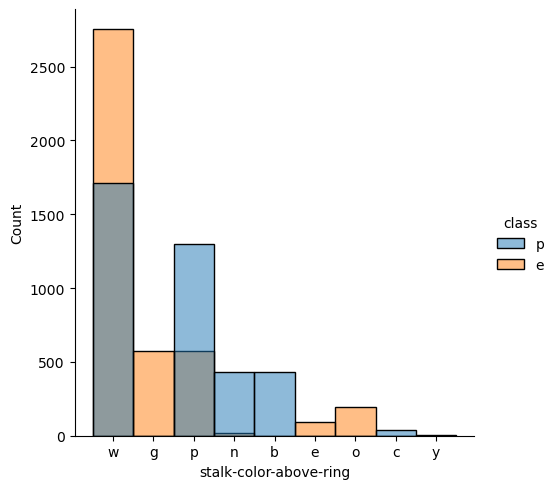

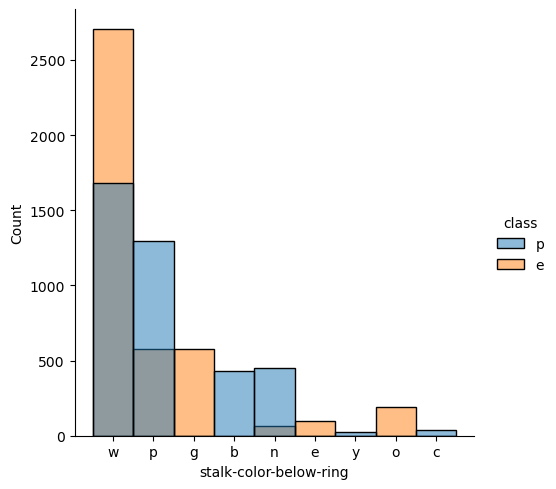

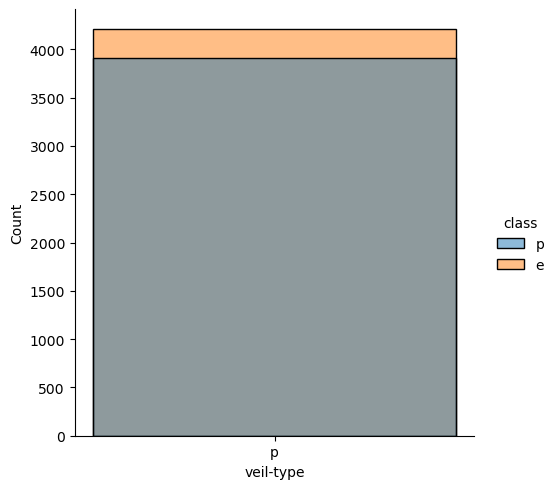

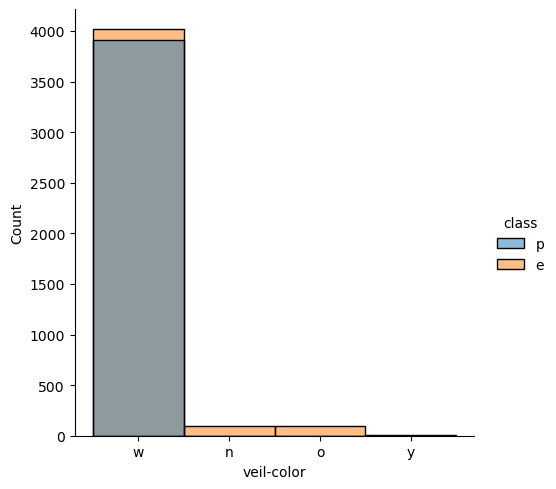

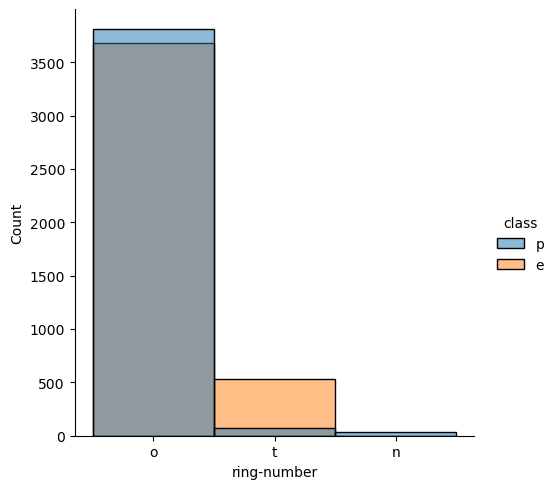

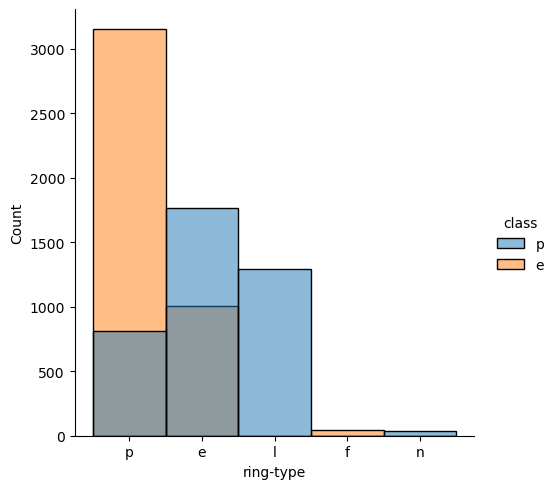

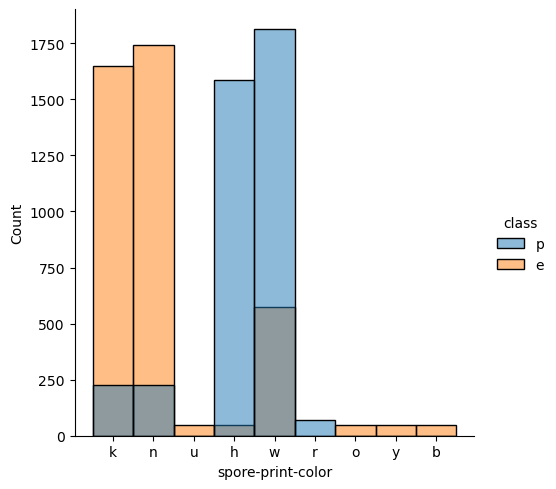

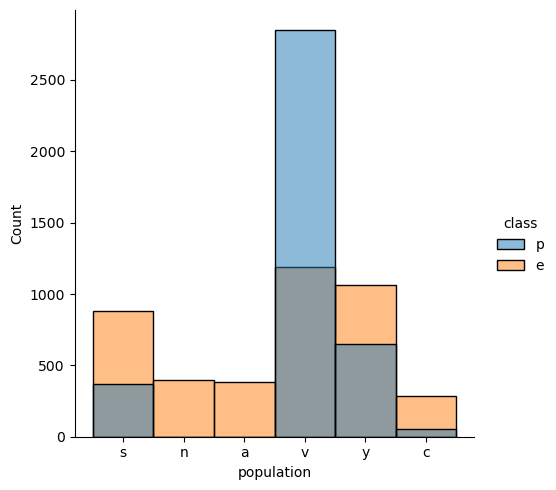

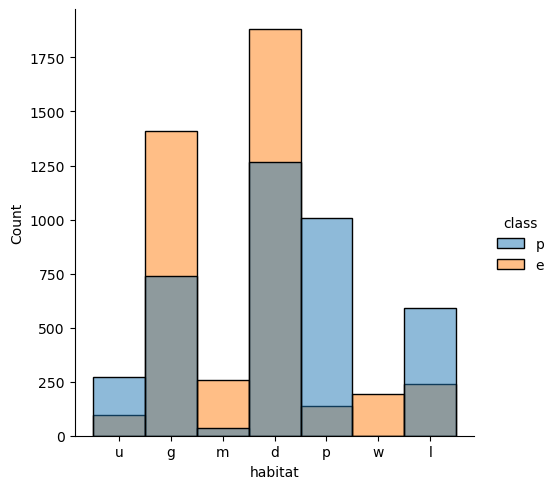

In [394]:
grouped_by_class = df.groupby('class')

# col ~ feature
for feature in list(df.columns.drop('class')):  # Начинаем со второго столбца, так как первый - это метка "class"
    print(grouped_by_class[feature].value_counts(normalize=True))

    sns.displot(
        data = df,
        x = feature,
        hue = 'class'
    )


## Task 2

In [400]:
class FreqClassifier():
    def __init__(self):
        self.__freq_dict = None

    def __find_freqs_relations(self, df, feature):
        grouped_by_class = df.filter(['class', feature]).groupby('class')
        
        distrib = grouped_by_class.value_counts(normalize=True)
        dict_distrib = dict(distrib)
        
        # print(distrib)
        
        freq_dict = sorted(dict_distrib, key=dict_distrib.get, reverse=True)
        # print('AA', freq_dict)
        
        return freq_dict

    def fit(self, df, feature):
        self.__freq_dict = self.__find_freqs_relations(df, feature)
        self.__feature = feature

    def predict(self, some_obj):
        # val = next(iter((lambda freq_class, freq_feature: some_obj['feature'] == freq_feature), self.__freq_dict))
        for freq_class, freq_feature in self.__freq_dict:
            if some_obj[self.__feature] == freq_feature:
                return freq_class

        # print(some_obj)
        # print(some_obj[self.__feature])
        return self.__freq_dict[0][0]

In [401]:
classifier = FreqClassifier()
classifier.fit(df, 'ring-number')

print(df.iloc[0])
print(classifier.predict(df.iloc[0]))

print(df.iloc[4])
print(classifier.predict(df.iloc[0]))

cap-shape                   x
cap-surface                 s
cap-color                   n
bruises%3F                  t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  k
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  s
habitat                     u
class                       p
Name: 0, dtype: object
p
cap-shape                   x
cap-surface                 s
cap-color                   g
bruises%3F                  f
odor                        n
gill-attachment             f
gill-spacing                w
gill-size                   b
gill-color                  k
stalk-shape    

In [402]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

train_len = int(len(df) * 0.8)
test_len = len(df) - train_len

classifier = FreqClassifier()
grouped_by_class = df.groupby('class')

for feature in list(df.columns.drop('class')):
    classifier.fit(df.iloc[:train_len], feature)

    actual = df.iloc[train_len:]['class']
    predicted = df.iloc[train_len:].apply(classifier.predict, axis=1)

    print(f'~~~ Feature: {feature}; accuracy: {accuracy_score(actual, predicted)}')

~~~ Feature: cap-shape; accuracy: 0.5193846153846153
~~~ Feature: cap-surface; accuracy: 0.7716923076923077
~~~ Feature: cap-color; accuracy: 0.22153846153846155
~~~ Feature: bruises%3F; accuracy: 0.707076923076923
~~~ Feature: odor; accuracy: 0.9950769230769231
~~~ Feature: gill-attachment; accuracy: 0.792
~~~ Feature: gill-spacing; accuracy: 0.8510769230769231
~~~ Feature: gill-size; accuracy: 0.9784615384615385
~~~ Feature: gill-color; accuracy: 0.8621538461538462
~~~ Feature: stalk-shape; accuracy: 0.02646153846153846
~~~ Feature: stalk-root; accuracy: 0.6615384615384615
~~~ Feature: stalk-surface-above-ring; accuracy: 0.5766153846153846
~~~ Feature: stalk-surface-below-ring; accuracy: 0.5526153846153846
~~~ Feature: stalk-color-above-ring; accuracy: 0.6504615384615384
~~~ Feature: stalk-color-below-ring; accuracy: 0.6492307692307693
~~~ Feature: veil-type; accuracy: 0.312
~~~ Feature: veil-color; accuracy: 0.803076923076923
~~~ Feature: ring-number; accuracy: 0.8849230769230769
~~

## Task 3

In [403]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop('class', axis=1)
y = df['class']

Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100500)

In [404]:
from sklearn.naive_bayes import CategoricalNB

naive_bayes_classifier = CategoricalNB()
naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
print(f'accuracy: {accuracy}')
# print(f'precision: {precision}')



accuracy: 0.9538461538461539


## Task 4

In [379]:
naive_bayes_classifier = MyCategoricalNaiveBayes()
naive_bayes_classifier.fit(X_train, y_train)

y_pred = naive_bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')


KeyError: 0